<a href="https://colab.research.google.com/github/chitransh1998/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Default Classification using Logistic Regression

Here, we use scikit-learn, a popular machine learning package in python to train and tune a classifier.
A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples).

## Dataset
The dataset we use is the default of credit card clients Data Set. There are two data files: "CreditDefault_training.csv" and "CreditDefault_Xtest.csv" Both files have the following fields, except the label ("default.payment.next.month") which is not available in "CreditDefault_Xtest.csv"

Features:

1 - LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
2 - SEX: (1 = male; 2 = female)
3- EDUCATION: (six levels: 1,2,3,4,5,6)
4 - MARRIAGE: (1 = married; 2 = single; 3 = others)
5 - AGE

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)
6 - PAY_1: the repayment status in September, 2005
7 - PAY_2: the repayment status in August, 2005
...
11 - PAY_6: the repayment status in April, 2005

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).
12 - BILL_AMT1 : amount of bill statement in September, 2005
13 - BILL_AMT2 : amount of bill statement in August, 2005
...
17 - BILL_AMT6 : amount of bill statement in April, 2005

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).
18 - PAY_AMT1 : amount paid in September, 2005
19 - PAY_AMT2 : amount paid in August, 2005
...
23 - PAY_AMT6 : amount paid in April, 2005

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)

Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target. Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
# Load your training data set
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))

Saving CreditDefault_training.csv to CreditDefault_training.csv


In [ ]:
# Split training data into X and y
df_cont = df.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month'], axis = 1)  #Exclude categorical and target variables
df_cat = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]  #categorical variables
y = df['default.payment.next.month']


## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

Standardization and one-hot encoding for training set and test set

In [ ]:
# Load test data set
uploaded = files.upload()
df_test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest.csv']))


Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [ ]:
# Split test data into X and y
df_test_cont = df_test.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1)  #Exclude categorical and target variables
df_test_cat = df_test[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]  #categorical variables
df_test.shape


(1000, 23)

In [ ]:
#standardization and one-hot encoding

#standardization and one-hot encoding for training set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fitting the scaler to the training data and transforming training set
df_cont_std = pd.DataFrame(sc.fit_transform(df_cont), columns = df_cont.columns)


from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

df_cat_encoded = pd.DataFrame(encoder.fit_transform(df_cat), columns=encoder.get_feature_names_out())

# Add new columns with 0 value to make sure all repayment_status appear for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
repayment_status_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for column in repayment_status_columns:
    unique_categories = df[column].unique()
    new_categories = np.setdiff1d(np.arange(-2, 10), unique_categories)
    for new_category in new_categories:
        df_cat_encoded[f'{column}_{new_category}'] = 0

# Display the first few rows of the encoded dataframe
print(df_cat_encoded.head())

# Resetting index to align the dataframes before combining
df_cat_encoded.reset_index(drop=True, inplace=True)
df_cont_std.reset_index(drop=True, inplace=True)

# Combining standardixed continuous and encoded categorical variables
X = pd.concat([df_cont_std, df_cat_encoded], axis=1)

# Print the shape of X
print('The shape of encoded X:', X.shape)

   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    0.0    1.0          0.0          1.0          0.0          0.0   
1    0.0    1.0          0.0          1.0          0.0          0.0   
2    1.0    0.0          1.0          0.0          0.0          0.0   
3    1.0    0.0          0.0          1.0          0.0          0.0   
4    0.0    1.0          0.0          1.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_4_1  PAY_4_6  \
0          0.0          0.0         0.0         1.0  ...        0        0   
1          0.0          0.0         0.0         1.0  ...        0        0   
2          0.0          0.0         1.0         0.0  ...        0        0   
3          0.0          0.0         0.0         0.0  ...        0        0   
4          0.0          0.0         1.0         0.0  ...        0        0   

   PAY_4_8  PAY_4_9  PAY_5_1  PAY_5_8  PAY_5_9  PAY_6_1  PAY_6_8  PAY_6_9  
0        0        0        0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#standardization and one-hot encoding for test set

# Fitting the scaler to the test data and transforming test set
df_test_cont_std = pd.DataFrame(sc.fit_transform(df_test_cont), columns = df_test_cont.columns)


from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

df_test_cat_encoded = pd.DataFrame(encoder.fit_transform(df_test_cat), columns=encoder.get_feature_names_out())

# Add new columns with 0 value to make sure all repayment_status appear for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
repayment_status_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for column in repayment_status_columns:
    unique_categories_test = df_test[column].unique()
    new_categories_test = np.setdiff1d(np.arange(-2, 10), unique_categories_test)
    for new_category_test in new_categories_test:
        df_test_cat_encoded[f'{column}_{new_category_test}'] = 0

# Display the first few rows of the encoded dataframe
print(df_test_cat_encoded.head())

# Resetting index to align the dataframes before combining
df_test_cat_encoded.reset_index(drop=True, inplace=True)
df_test_cont_std.reset_index(drop=True, inplace=True)

# Combining standardixed continuous and encoded categorical variables
X_test = pd.concat([df_test_cont_std, df_test_cat_encoded], axis=1)

# Ensure the number of features in the test set matches the trained model
if X_test.shape[1] < X.shape[1]:
    # Add missing columns in the test set and set their values to 0
    missing_columns = np.setdiff1d(X.columns, X_test.columns)
    for missing_column in missing_columns:
        X_test[missing_column] = 0
# Print the shape of your X
print('The shape of encoded X_test:', X_test.shape)
print(list(X_test.columns))

   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    1.0    0.0          0.0          0.0          0.0          0.0   
1    1.0    0.0          1.0          0.0          0.0          0.0   
2    0.0    1.0          1.0          0.0          0.0          0.0   
3    0.0    1.0          0.0          1.0          0.0          0.0   
4    1.0    0.0          1.0          0.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_5_6  PAY_5_7  \
0          0.0          1.0         1.0         0.0  ...        0        0   
1          0.0          0.0         0.0         1.0  ...        0        0   
2          0.0          0.0         1.0         0.0  ...        0        0   
3          0.0          0.0         0.0         1.0  ...        0        0   
4          0.0          0.0         1.0         0.0  ...        0        0   

   PAY_5_8  PAY_5_9  PAY_6_1  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  PAY_6_9  
0        0        0        0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [ ]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)

X_train: (2789, 97)
y_train: (2789,)
X_val: (1196, 97)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier.


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels

### WRITE CODE HERE ###
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)
### WRITE CODE HERE ###
classifier = LogisticRegression(max_iter = 200)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# predict the output for validation dataset
### WRITE CODE HERE
y_pred = classifier.predict(X_val)

In [ ]:
#Converting y_val to an array
y_val_arr = (np.array(y_val).reshape(-1, 1))

Implement my_precision(), my_recall(), my_accuracy() by yourselves

In [ ]:
def my_precision(y, y_preds): #TP/(TP+FP)
  tp = 0
  fp = 0
  tn = 0
  fn = 0

  for i in range(len(y_preds)):
    if y_preds[i] == 1 and y[i] == 1:
        tp += 1
    elif y_preds[i] == 1 and y[i] == 0:
        fp += 1
    elif y_preds[i] == 0 and y[i] == 0:
        tn += 1
    elif y_preds[i] == 0 and y[i] == 1:
        fn += 1

  precision = tp/(tp+fp)
  return precision

def my_recall(y, y_preds): #TP/(TP+FN)
  tp = 0
  fp = 0
  tn = 0
  fn = 0

  for i in range(len(y_preds)):
    if y_preds[i] == 1 and y[i] == 1:
        tp += 1
    elif y_preds[i] == 1 and y[i] == 0:
        fp += 1
    elif y_preds[i] == 0 and y[i] == 0:
        tn += 1
    elif y_preds[i] == 0 and y[i] == 1:
        fn += 1

  recall = tp/(tp+fn)
  return recall


def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
  tp = 0
  fp = 0
  tn = 0
  fn = 0

  for i in range(len(y_preds)):
    if y_preds[i] == 1 and y[i] == 1:
        tp += 1
    elif y_preds[i] == 1 and y[i] == 0:
        fp += 1
    elif y_preds[i] == 0 and y[i] == 0:
        tn += 1
    elif y_preds[i] == 0 and y[i] == 1:
        fn += 1

  accuracy = (tp+tn)/(tp+fp+fn+tn)
  return accuracy

Use your above functions to compute precision, recall, and accuracy of your model on validation set:

In [ ]:
### WRITE CODE HERE
# Calculate Precision
precision = my_precision(y_val_arr, y_pred)

# Calculate Recall
recall = my_recall(y_val_arr, y_pred)

# Calculate Accuracy
accuracy = my_accuracy(y_val_arr, y_pred)

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.6610
Recall: 0.4333
Accuracy: 0.8219


Q. Accuracy<br>
Ans - The accuracy is 0.8219.

Q. Precision<br>
Ans - The precision is 0.6610.

Q. Recall<br>
Ans - The recall is 0.4333.

Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans -   Accuracy is a good metric when the class distribution is roughly equal. It provides an overall measure of how well your model is performing across all classes.

Precision is crucial when the cost of false positives is high. For example, in email spam detection, a high precision model would not incorrectly classify important emails as spam.

Recall is important when the cost of false negatives is high.It is especially crucial in cases where missing a positive instance is costly. For example, in medical diagnosis, a high recall model would identify most patients with a disease, minimizing the chance of missing a diagnosis.

If the dataset has a significant class imbalance, and the cost of false positives is high, precision might be a more appropriate metric than accuracy.

Q. Which metric is suitable in this case? <br>
Ans - Recall is suitable in this case as missing out defaults (false negatives) is costly.

### ROC curve

Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions and to draw ROC curve.

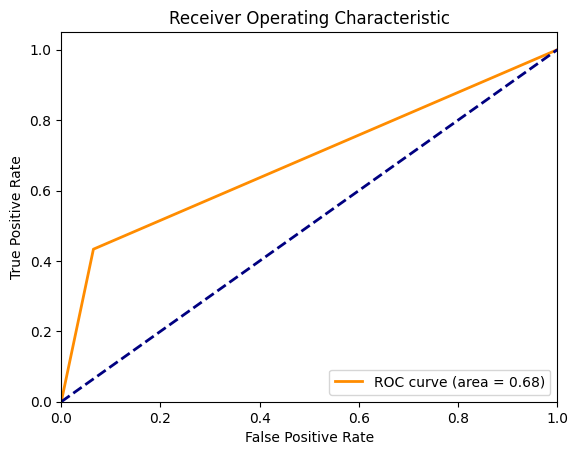

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Q. What is the AUC obtained?<br>
Ans - The AUC obtained is 0.6843.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
### WRITE CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1800)
param_grid = {
    'penalty': ['l1'],
    'C': [0.1],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print(f'Best Score: {best_score:.4f}')

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_val)

precision = my_precision(y_val_arr, y_pred)
recall = my_recall(y_val_arr, y_pred)
accuracy = my_accuracy(y_val_arr, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8088891462841772
Precision: 0.6805
Recall: 0.4259
Accuracy: 0.8253


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
### WRITE CODE HERE
classifier = LogisticRegression(max_iter=1800)
param_grid = {
    'penalty': ['l1'],
    'C': [0.5],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print(f'Best Score: {best_score:.4f}')

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_val)

precision = my_precision(y_val_arr, y_pred)
recall = my_recall(y_val_arr, y_pred)
accuracy = my_accuracy(y_val_arr, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Best Parameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.814984266712998
Precision: 0.6686
Recall: 0.4333
Accuracy: 0.8236


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
### WRITE CODE HERE
classifier = LogisticRegression(max_iter=1800)
param_grid = {
    'penalty': ['l2'],
    'C': [0.1],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print(f'Best Score: {best_score:.4f}')

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_val)

precision = my_precision(y_val_arr, y_pred)
recall = my_recall(y_val_arr, y_pred)
accuracy = my_accuracy(y_val_arr, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8124753061395211
Precision: 0.6628
Recall: 0.4222
Accuracy: 0.8211


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. (Try to use a different solver or increase the number of iterations if there is a ConvergenceWarning)

In [ ]:
### WRITE CODE HERE
classifier = LogisticRegression(max_iter=1800)
param_grid = {
    'penalty': ['l2'],
    'C': [0.5],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print(f'Best Score: {best_score:.4f}')

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_val)

precision = my_precision(y_val_arr, y_pred)
recall = my_recall(y_val_arr, y_pred)
accuracy = my_accuracy(y_val_arr, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Best Parameters: {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8136
Precision: 0.6648
Recall: 0.4333
Accuracy: 0.8227


**Analyzing which model is better?**

If we focus on high recall, then the c = 0.5 and l1 penalty model will be the most optimal since it captures the most positives. On the other hand, the c = 0.1 and l1 penalty model has the best precision and accuracy. So we decide to run our prediction based on this model.


# Test set

We have worked on training and validation dataset so far, but test data does not include the labels. Choose the best hyperparameter values as seen in previous section and build a model. We use this model to make predictions on test set.

In [ ]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty) ###
# return the prediction as "y_pred"
X_test = X_test[X.columns]
classifier = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=200)
classifier.fit(X, y)

# return the prediction as "y_pred"
y_pred = classifier.predict(X_test)
print("Predictions on the test set:", y_pred)
